## Sprint 4 Modeling

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
crime_in = pd.read_csv('crimedata2.csv')
print(crime_in.shape)
crime_in = crime_in.replace('?', np.nan)
crime_in.head()

print(crime_in.isnull().sum())
# replace null values in ViolentCrimesPerPop with knn imputation
from sklearn.impute import KNNImputer

columns = ['agePct12t29', 'PctLess9thGrade','PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctNotHSGrad', 'PctBSorMore', 'population', 'murdPerPop', 
           'assaultPerPop', 'rapesPerPop','ViolentCrimesPerPop']
# imputer = KNNImputer(n_neighbors=3)
# crime_in['ViolentCrimesPerPop'] = imputer.fit_transform(crime_in[['ViolentCrimesPerPop']])
crime_in = crime_in.dropna(subset = ['ViolentCrimesPerPop'])
crime_in[columns] = crime_in[columns].astype(float)
print(crime_in['ViolentCrimesPerPop'])
# convert columns to float
crime_in = crime_in[columns].interpolate()
print(crime_in.head())

(2215, 147)
communityname             0
state                     0
countyCode             1221
communityCode          1224
fold                      0
                       ... 
autoTheftPerPop           3
arsons                   91
arsonsPerPop             91
ViolentCrimesPerPop     221
nonViolPerPop            97
Length: 147, dtype: int64
0        41.02
1       127.56
2       218.59
3       306.64
5       442.95
         ...  
2210    545.75
2211    124.10
2212    353.83
2213    691.17
2214    918.89
Name: ViolentCrimesPerPop, Length: 1994, dtype: float64
   agePct12t29  PctLess9thGrade  PctSpeakEnglOnly  PctNotSpeakEnglWell  \
0        21.44             5.81             85.68                 1.37   
1        21.30             5.61             87.79                 1.81   
2        25.88             2.80             93.11                 1.14   
3        25.20            11.05             94.98                 0.56   
5        32.89             8.76             96.87              

In [33]:
columns = ['agePct12t29', 'PctLess9thGrade','PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctNotHSGrad', 'PctBSorMore', 'population', 'murdPerPop', 
           'assaultPerPop', 'rapesPerPop','ViolentCrimesPerPop']
crime_in[columns] = crime_in[columns].astype(float)

crime_in.loc[(crime_in['population'] >= 10000) & (crime_in['population'] < 25000), 'size'] = 'small'
crime_in.loc[(crime_in['population'] >= 25001) & (crime_in['population'] < 50000), 'size'] = 'medium'
crime_in.loc[(crime_in['population'] >= 50001) & (crime_in['population'] < 200000), 'size'] = 'large'
crime_in.loc[crime_in['population'] >= 200000, 'size'] = 'superLarge'
crime_in.head()

,agePct12t29,PctLess9thGrade,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctNotHSGrad,PctBSorMore,population,murdPerPop,assaultPerPop,rapesPerPop,ViolentCrimesPerPop,size
0,21.44,5.81,85.68,1.37,9.90,48.18,11980.0,0.00,32.81,0.00,41.02,small
1,21.30,5.61,87.79,1.81,13.72,29.89,23123.0,0.00,102.05,4.25,127.56,small
2,25.88,2.80,93.11,1.14,9.09,30.13,29344.0,8.30,38.74,16.60,218.59,medium
3,25.20,11.05,94.98,0.56,33.68,10.81,16656.0,0.00,190.93,57.86,306.64,small
5,32.89,8.76,96.87,0.60,23.03,20.66,140494.0,4.63,297.29,50.98,442.95,large


In [34]:
columns = ['agePct12t29', 'PctLess9thGrade','PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctNotHSGrad', 'PctBSorMore', 'population', 'murdPerPop', 
           'assaultPerPop', 'rapesPerPop','ViolentCrimesPerPop', 'size']
crime_clean_set = crime_in[columns]

In [35]:
crime_clean_set['ViolentCrimesCat'] = pd.cut(crime_clean_set['ViolentCrimesPerPop'], bins=3, labels=['low', 'medium', 'high'])
crime_clean_set['ViolentCrimesCat'].value_counts()

ViolentCrimesCat
low       1853
medium     129
high        12
Name: count, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
X = crime_clean_set.drop(columns=['ViolentCrimesPerPop', 'size', 'ViolentCrimesCat'])
y = crime_clean_set['ViolentCrimesCat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1595, 10), (399, 10), (1595,), (399,))

## DT CART

In [37]:
# deciesion tree regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error

# Train the model and fit to test data
dt_cart = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = dt_cart.predict(X_test)

## Decision Tree C5.0

In [38]:
# Train the model and fit to test data
from sklearn.tree import DecisionTreeClassifier
dt_c50 = DecisionTreeClassifier(criterion = 'entropy').fit(X_train, y_train)
y_pred = dt_c50.predict(X_test)

## Random Forest

In [40]:
# random forest regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

# Train the model and fit to test data
rf = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [49]:
# Calculate Average ViolentCrimesPerPop for baseline
avgViolent = crime_clean_set['ViolentCrimesPerPop'].mean()
print(avgViolent)
# Add average to the dataset
crime_clean_set['AvgViolentCrimesPerPop'] = avgViolent

589.078921765296


In [50]:
from sklearn.model_selection import train_test_split
X = crime_clean_set.drop(columns=['ViolentCrimesPerPop', 'size', 'ViolentCrimesCat'])
y = crime_clean_set['ViolentCrimesPerPop']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1595, 11), (399, 11), (1595,), (399,))

Mean Squared Error: 328508.5794643788
Root Mean Squared Error: 573.1566796822478


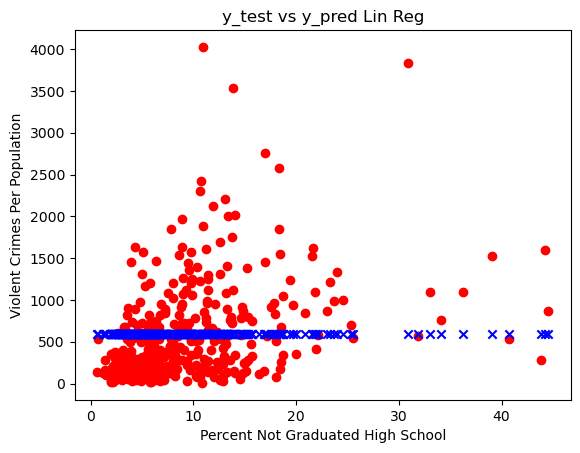

In [51]:




# Imports
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Model
baseline = LinearRegression().fit(X_train, y_train)
y_pred = crime_clean_set['AvgViolentCrimesPerPop'][:399]


# Print Details
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))


# Print graph
X_train.shape, X_test.shape, y_train.shape, y_test.shape, y_pred.shape
plt.scatter(X_test.iloc[:,1], y_test, color='red')
plt.scatter(X_test.iloc[:,1], y_pred, color='blue', marker='x')
plt.title('y_test vs y_pred Lin Reg')
plt.xlabel('Percent Not Graduated High School')
plt.ylabel('Violent Crimes Per Population')
plt.show()


plt.show()





# Possible Classification Models 